## K8 Introduction

____

+ Container Orchestration
+ K8s Architecture.
+ Master v Worker Nodes
+ Kubectl


## Setup
___

Where to get OS:

www.osboxes.org


1. Download Oracle Virtual Box, and install Ubuntu image
2. From www.osboxes.org, and select Xenial 16.04
3. Set network to Bridge Network
4. Make a snapshopt before power up
5. Must sudo su, then do point 4.
6. Then update && upgrade (this may take 3 - 4 hours)
7. Then install docker for unbutu. (make sure to remove /, and make one command
8. Install guest extensions for managing screen layout


Setup ssh on image

1. For speeding things up, issue the following command:

On Server:

```
ip addr show
apt-get install openssh-server
service sshd status
service ufw status
ufw allow ssh
ufw enable
```
On client:

```
ssh osboxes@192.168.0.111
password:osboxes.org
``


## Container Orchestration

____

What if we have mulitiple containers,and they need to interoperate. What software do we use to manage multiple containers. Thus we need an underlying platform with a set of resources and capabilities, that needs to orchestrate the activities between the containers.


K8s (from Google) is a container orchestration technologie, there are other as well such as Docker Swarm by docker, and Mesos by Apache.

Multiple instances can be run on different nodes. This is just one of the advantages. And the user traffic is load balances across instances. 

By using Declaratibe object configuration files.

K82 orchestrates the deployment and management of conyainers in a clustered environment.





## K8s Architecture

____

Before setting up a K8s cluster you will need to understand the architecture first.


Lets start with a node: A node is a machine, physical or virtual, on which k8s is installed. It is a worker machines on which K8s will load containers. See the types of containers it may run


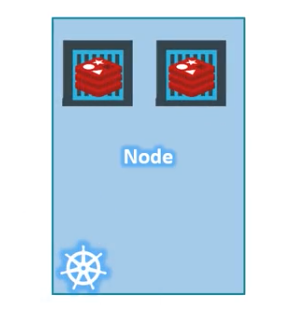

But lets say thay node fails, so out application wil now go down. How to we build in high availability or fault tolerance?

So we need to have more than one node. A cluster is a set of nodes that are grouped together. So if one node fails, you still have the application to be running, as it is been serviced by the other nodes. However having multiple nodes also allow you to share the load as well.

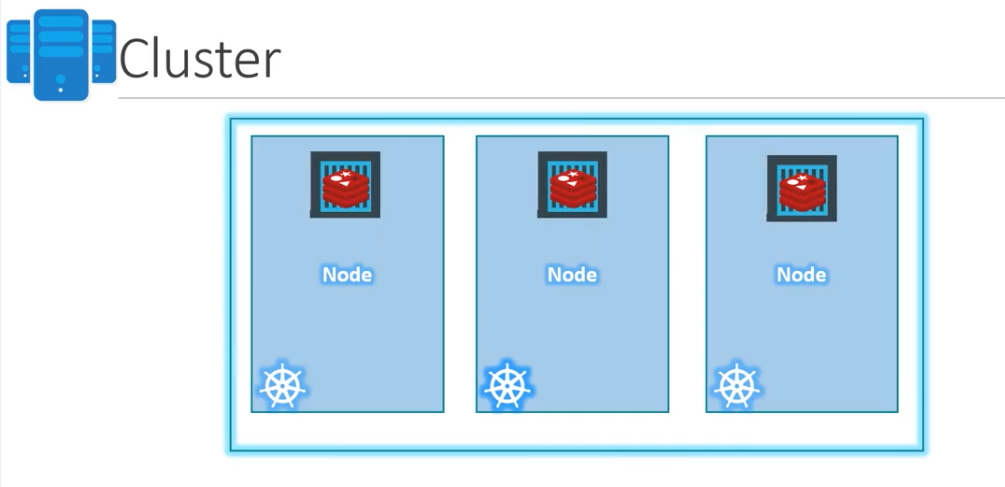

But who is responsible for managing the cluster? Where is the information about the members of the cluster stored? How are the nodes monitored? When a node fails, how do you moved the workload of the failed node to another worker node?

This is the job for the master

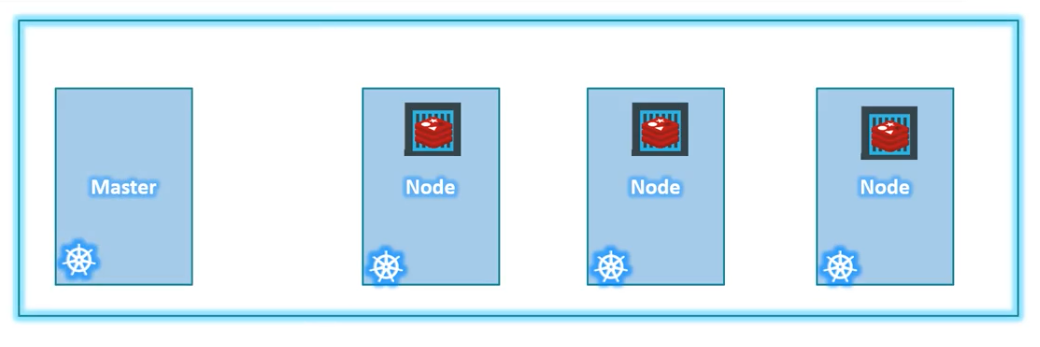

The master is another node with k8s installed, but the node is configured as a master. Its watching over the other nodes and is responsible for orchestration of the worker nodes

So when you installing k8s on a system you installing the following components:

1. API Server - Acts as the front end for K8s. The users, management devises, command line interfaces, all talk to the API server, to interact with the K8s cluster.
2. Etcd key store - this is a distributed reliable key value store, used to store all data to manage the cluster. Its stores the information in a distributed manner.
3. Scheduler - Is responsible for distibuting work for containers, across multiple nodes.It looks for containers that was newly created and assigns them nodes
4. Controller - This is the brain behind the orchestration. Is nodes or endpoints goes down, it notices this, and makes decisions to bring up new available containers in such cases.
5. Container Runtime - This is the underlying software to run containers. aka, docker, but is can also accommodate others such as ..
6. Kubelet - This is the agent that runs on each node in the cluster. The agent is responsible to make sure the container is running on the nodes


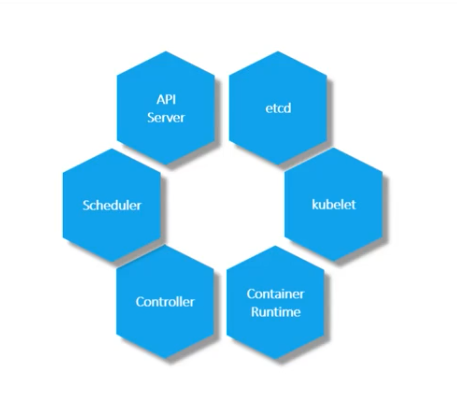
        












## Master v Worker Nodes

___

We know now we have a master and worker nodes. And we have identified the set of components that make up k8s.

But how does one server become a master and the other the worker or slave. 

Note the master does not have containers, the worker nodes have the containers.

So the worker nodes will have the containers running on it. That means it will need container runtime to be installed on it. In our case it will be docker. But it does not have to be docker, it can also be rkt or cri-o.

The master node will have the kube-apiserver, which makes it the master, Whereas the slaves or workers will have the kubelet service/agent, responsible for interacting with the master, to provide health information about the worker node, and carry out actions as requested by the master


All the information about the nodes and master is stored in the key-value store, called the etcd on the master

The master also has the control manager, aka controller

The master also has the scheduler.

(There are also other components)

Its important to understand which components sits where (when we do the installation)

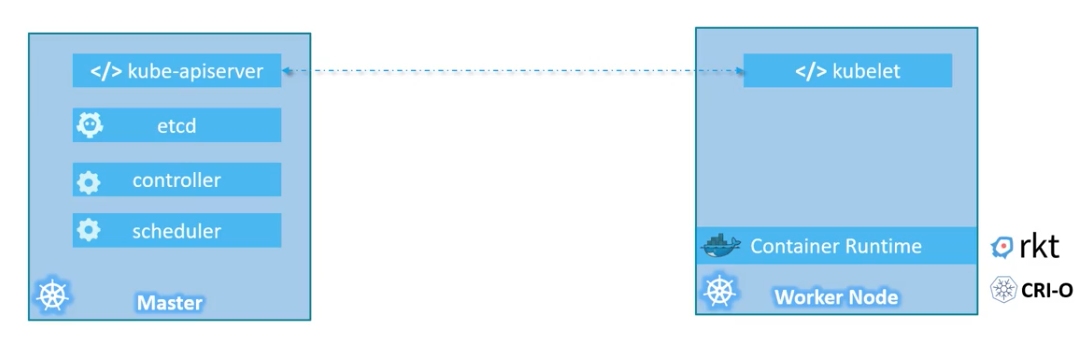


##  Kubectl
___

This is a command line utility. Also called "Kube control".

Kubectl is used:

1. To deploy and manage applications on a k8s cluster
2. To get cluster information
3. To get the status of othe nodes in the cluster.
4. to manage many other things

```kubectl run hello-minikube``` is to deploy an application on a cluster.

```kubectl cluster-info``` is to view informtion about the cluster.

```kubectl get nodes``` is to list all the nodes that part of the cluster.



